## Preliminaries

### Variational Approximation

Variational approximation is a popular method for function approximation that is used a widely used in many fields including Machine learning and Statistics. It takes the name from its origin in the calculus of variations. The approximation generally involves estimating the original function with comparatively simpler function albeit at the cost of introducing new auxilliary variables. Here, we will discuss variational approximation with a couple of simple examples.

In [13]:
##########################
# Import necessary modules
##########################

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Let us consider the example of logarithmic function

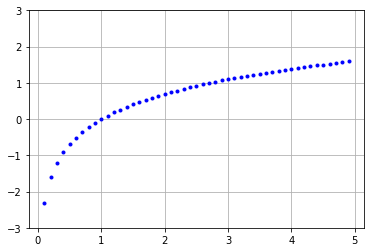

In [14]:
#################################
# Function: Logarithm  [ log(x) ]
#################################

x = np.expand_dims(np.arange(0.1,5,0.1),0)

plt.plot(x,np.log(x),'.b')
plt.ylim([-3,3])
plt.grid(True)
plt.show()

The logarithmic function $\log(x)$ can be represented variationally as follows, $$\log(x) = \min_{\lambda}\{\lambda x-\log(\lambda)-1\}.$$ You can verify analytically that this indeed is a correct representation for the logarithmic function. In this representation, $\lambda$ is the variational parameter and in order to evaluate the function $\log(x)$ for any $x$, we need to solve the minimization with respect to $\lambda$ for the given $x$. In this case, it can be verified that for any given $x$, the corresponding $\lambda$ would be $1/x$. Let us plot the local variational approximation to the logarithmic function at a given x. 

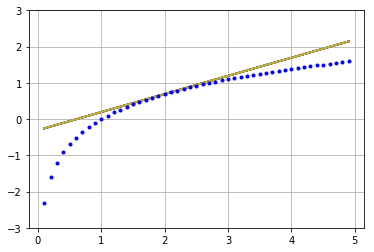

In [4]:
#################################################################
# Variational approximation to Logarithm  (Evaluation at a point)
#################################################################

x = np.expand_dims(np.arange(0.1,5,0.1),0)

x0 = 2.     # Evaluate the variational approximation at x=2

lambd = 1/x0    # compute lambda for x0
f_lambda = x.T*lambd - np.tile(np.log(lambd)+1,[x.shape[0],1]);   # Variational upper-bounds

plt.plot(np.tile(x.T,[1,x.shape[1]]),f_lambda)
plt.hold
plt.plot(x,np.log(x),'.b')
plt.ylim([-3,3])
plt.grid(True)
plt.show()

As can be observed, the local variational approximation is a linear function which is also an upper-bound to the logarithmic function. Now, let us plot the local variational approximation to the logarithmic function at various points in the domain. 

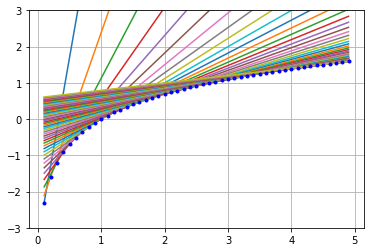

In [11]:
####################################################################
# Variational approximation to Logarithm  (Envelope of upper-bounds)
####################################################################

x = np.expand_dims(np.arange(0.1,5,0.1),0)

lambd = 1/x    # compute lambda for all x
f_lambda = x.T*lambd - np.tile(np.log(lambd)+1,[x.shape[0],1]);   # Variational upper-bounds

plt.plot(np.tile(x.T,[1,x.shape[1]]),f_lambda)
plt.hold
plt.plot(x,np.log(x),'.b')
plt.ylim([-3,3])
plt.grid(True)
plt.show()

As can be seen in the figure above, the variational upper-bounds form a tight upper-envelope on the logarithmic function. This is actually a property of not only the logarithmic function but all concave functions, that, you can have such tight upper-bounding hyper-planes (called supporting hyper-planes) at any point in the domain of a concave function.

Now, let us consider the a slightly more complicated function, the logistic function $1/(1+e^{-x})$.

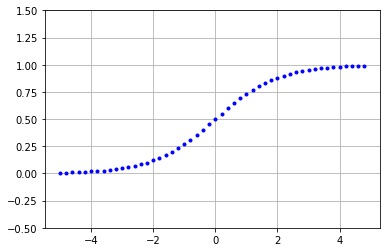

In [9]:
#######################################
# Function: Logistic  [ 1/(1+exp(-x)) ]
#######################################

x = np.expand_dims(np.arange(-5,5,0.2),0)

plt.plot(x,1/(1+np.exp(-x)),'.b')
plt.ylim([-0.5,1.5])
plt.grid(True)
plt.show()

The logarithmic function $\log(x)$ can be represented variationally as follows, $$\log(x) = \min_{\lambda}\{e^{\lambda x-H(\lambda)}\}.$$ Where, $H(\lambda)=-\lambda\log(\lambda)-(1-\lambda)\log(1-\lambda)$. In this case, it can be verified that for any given $x$, the corresponding $\lambda$ can be evaluated as $1/(1+e^x)$. Let us plot the local variational approximation to the logistic function at a given x. 

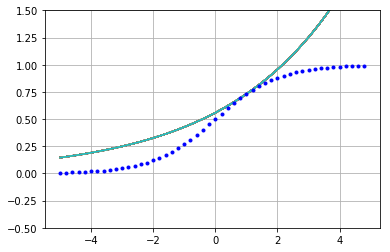

In [8]:
################################################################
# Variational approximation to Logistic  (Evaluation at a point)
################################################################

x = np.expand_dims(np.arange(-5,5,0.2),0)

x0 = 1.

lambd = 1/(1+np.exp(x0))  # compute lambda for x0

intercept = np.tile( -lambd*np.log(lambd) -(1-lambd)*np.log(1-lambd),[x.shape[0],1])
f_lambda = np.exp(x.T*lambd - intercept)   # Variational upper-bounds

plt.plot(np.tile(x.T,[1,x.shape[1]]),f_lambda)
plt.hold
plt.plot(x,1/(1+np.exp(-x)),'.b')
plt.ylim([-0.5,1.5])
plt.grid(True)
plt.show()

As can be observed, the local variational approximation is an exponential function which is also an upper-bound to the logistic function. Now, let us plot the local variational approximation to the logistic function at various points in the domain. 

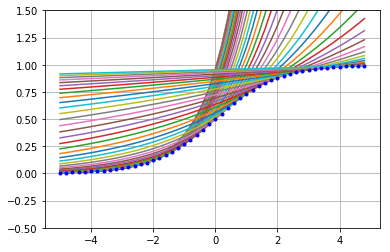

In [12]:
###################################################################
# Variational approximation to Logistic  (Envelope of upper-bounds)
###################################################################

x = np.expand_dims(np.arange(-5,5,0.2),0)

lambd = 1/(1+np.exp(x))  # compute lambda for all x

intercept = np.tile( -lambd*np.log(lambd) -(1-lambd)*np.log(1-lambd),[x.shape[0],1])
f_lambda = np.exp(x.T*lambd - intercept)   # Variational upper-bounds

plt.plot(np.tile(x.T,[1,x.shape[1]]),f_lambda)
plt.hold
plt.plot(x,1/(1+np.exp(-x)),'.b')
plt.ylim([-0.5,1.5])
plt.grid(True)
plt.show()

Similar to as in case of the logarithmic function, the variational upper-bounds form a tight upper-envelope on the logistic function, only difference is that the upper-bounds are exponential rather than linear. This is actually expected because, the logistic function is log-concave, that is, $\log(1/(1+e^{-x}))$ is a concave function (Try to analyze and convince yourself why this is true).

We considered a couple of simple examples of variational approximation here. Such variational approximations can be constructed for many complicated functions. However, there is no single recipe to construct good variational approximations to functions and designing useful variational approximations for complicated functions is often a research problem.

### How is variational approximation useful ?

As seen through the above examples, we can locally approximate a function by another function ie the logarithm function can be approximated by set of linear functions. Let's say if we use gradient ascent/descent to maximize/minimize the loss function, we can compute the gradient of it's local variational upper bound, which is an easier task since it is a linear function. In this particular case of logarithm, we would not require this as logarithm is comparitively simple function. However, it would be practical to use such approximations for functions that are more complicated.  